# Homework 1

In [1]:
import csv
import sys
from collections import Counter
import numpy as np
import random
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv.field_size_limit(sys.maxsize)

with open('amazon_reviews_us_Gift_Card_v1_00.tsv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    data = list(reader)

# Question 1

In [3]:
#print(len(data))
info = data[0]
data = data[1:]
print(info)

ratings = [int(d[info.index('star_rating')]) for d in data]

dict_rating = dict(Counter(ratings))
rating_dist = []
ratings_sum = 0

for key in sorted(dict_rating.keys()):
    value = dict_rating[key]
    rating_dist.append((key, value))
    ratings_sum += value
    
print(rating_dist)
print(ratings_sum)

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']
[(1, 4793), (2, 1569), (3, 3156), (4, 9859), (5, 129709)]
149086


## Q1 ANSWER: 

The disctribution of the dataset is as follows: (star_rating, #data points)
(1, 4793), (2, 1569), (3, 3156), (4, 9859), (5, 129709)

There are 149086 points in the dataset.

# Question 3

In [4]:
def feature(datum):
    """
    Makes the following feature vector: [1, review verified, review_length]
    """
    feat = [1]
    feat.append(datum[info.index('verified_purchase')] == 'Y')
    feat.append(len(datum[info.index('review_body')]))
    return feat
                              
X = [feature(d) for d in data]
y = [int(d[info.index('star_rating')]) for d in data]
#y = [d['review/overall'] for d in data]

theta,residuals,rank,s = np.linalg.lstsq(X, y)
print(theta)

[ 4.84461817e+00  5.04148265e-02 -1.24659895e-03]


## Q3 ANSWER

Theta0 = 4.84461817e+00    -  Bias term   
Theta1 = 5.04148265e-02    -  Verified_purchase coeffieicent   
Theta2 = -1.24659895e-03   -  Review bodylength coeffieicent   

Theta0, the bias term determines where our initial guess of rating starts from. If is not verified and has 0 length, we guess a 4.844.. rating for it. 

Theta1 is a positive coefficient, which means for verified purchases we are expecting higher star rating. The verified_purchase feature is either 0 or 1, so we are adding 0 or 5.04148265e-02 to the rating in each case, respectively. It makes a very small change to our prediction.

Theta2 is a negative coefficient. This means the longer the review gets, the smaller star rating we are guessing for it. Our model is basically saying longer reviews mean lower ratings. Again, the coefficient is quite small compared to the bias term, but for very long reviews it could have a bigger impact.

# Question 4

In [20]:
def feature(datum):
    """
    Makes the following feature vector: [1, review verified, review_length]
    """
    feat = [1]
    feat.append(datum[info.index('verified_purchase')] == 'Y')
    return feat
                              
X = [feature(d) for d in data]
y = [int(d[info.index('star_rating')]) for d in data]
#y = [d['review/overall'] for d in data]

theta,residuals,rank,s = np.linalg.lstsq(X, y)
print(theta)

[4.57758356 0.16852426]


## Q4 ANSWER

Theta0 = 4.57758356    -  Bias term   
Theta1 = 0.16852426    -  Verified_purchase coeffieicent   

Here Theta0 is changed somewhat, but Theta1 changed significantly. Here we are considering a different portion of the dataset (meaning with a feature removed). This would effect our model because we are using different information to build the model. For example, there might be a correlation between verified_purchase and review body length, which would reduce their individual coefficients (mitigating double counting). The coefficient of star_rating might higher as it is a better source of information then before, because we don't have information about the body length. The same goes for Theta0 as well, but we can see that it is effected less.

From a mathematical / geometric perspective, the subspace that our data points are in changes. This may cause a significant change in the hyperplane (or just normal plane) we are fitting on the points with linear regression. It depends on the characteristics of the distribution.

# Question 5

In [50]:
data_len = len(data)
train_size = int(data_len*0.9)
test_size = data_len - train_size

random.shuffle(data)

features = np.array([feature(d) for d in data])
labels   = np.array([int(d[info.index('star_rating')]) for d in data])

X_train, y_train = features[:train_size], labels[:train_size]
X_test, y_test = features[train_size:], labels[train_size:]

In [51]:
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)
#print(theta)
theta_m = np.array(theta)
theta_m.shape = (2,1)
rating_predictions_train = np.dot(X_train,theta_m)
rating_predictions_test = np.dot(X_test,theta_m)

In [52]:
# y_train.shape = rating_predictions_train.shape
# y_test.shape = rating_predictions_test.shape
# MSE_train = np.mean((rating_predictions_train - y_train)**2)
# MSE_test  = np.mean((rating_predictions_test - y_test)**2)

In [53]:
MSE_train = mean_squared_error(rating_predictions_train,y_train)
MSE_test  = mean_squared_error(rating_predictions_test,y_test)
print('Train set MSE = ', MSE_train)
print('Test set MSE  = ', MSE_test)

Train set MSE =  0.684762379606768
Test set MSE  =  0.6919309057128779


## Q5 ANSWER

The answer to Question 5 is given in the print statements of the above cell.

For this question, and any question involving train data / test data splits, I will always use shuffled data (as above). I know we are supposed to be in the learning process in this HW, but I believe my explanations for the shuffling will be enough.

The shuffling is because the way the data is collected might have some type of order or bias in it. When we do splits, we are training on a subset of the data (the 90% in this case) but we are assuming it would have a similar distribution to the 100%. When we shuffle, me make our assumption stronger (but not fully correct).

# Question 7

In [94]:
runs_MSE_train = []
runs_MSE_test = []
train_percent_sizes = np.array(range(5,96,5))
runs_range = 200

for runs in range(runs_range):
    
    random.shuffle(data)
    features = np.array([feature(d) for d in data])
    labels   = np.array([int(d[info.index('star_rating')]) for d in data])

    MSE_train_results = []
    MSE_test_results  = []

    for train_percent_size in train_percent_sizes:
        train_size = int(data_len*(train_percent_size/100))
        test_size = data_len - train_size

        X_train, y_train = features[:train_size], labels[:train_size]
        X_test, y_test = features[train_size:], labels[train_size:]

        theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

        theta_m = np.array(theta)
        theta_m.shape = (2,1)
        rating_predictions_train = np.dot(X_train,theta_m)
        rating_predictions_test = np.dot(X_test,theta_m)

        MSE_train = mean_squared_error(rating_predictions_train,y_train)
        MSE_test  = mean_squared_error(rating_predictions_test,y_test)

        MSE_train_results.append(MSE_train)
        MSE_test_results.append(MSE_test)
        
    runs_MSE_train.append(MSE_train_results)
    runs_MSE_test.append(MSE_test_results)
    
#runs_MSE_train = np.array(runs_MSE_train)
#runs_MSE_test = np.array(runs_MSE_test)

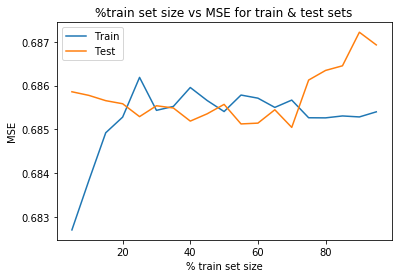

In [99]:
train_MSE_avgs = np.mean(runs_MSE_train, axis=0)
test_MSE_avgs = np.mean(runs_MSE_test, axis=0)
plt.plot(train_percent_sizes,train_MSE_avgs, label='Train')
plt.plot(train_percent_sizes,test_MSE_avgs, label='Test')
plt.ylabel('MSE')
plt.xlabel('% train set size')
plt.title('%train set size vs MSE for train & test sets')
plt.legend()
plt.show()

## Q7 ANSWER

To answer this question, I ran 200 seperate tests, each including a different initial shuffling of the dataset. I found that for individual tests, the train / test errors vary greatly, so it is harder to make an accurate statement. I am not sure if 200 tests are enough, but the number comes from the limits of my laptop.

The test MSE is lowest at the split: 75% train, 25% test. The values of MSE for test range from 0.686 to 0.687, so the split is not making much of a difference. Normally, we would expect it to make a significant impact considering splits like 5% train, %test 95. I think this shows us that we are not learning something very useful with the model. The model is probably not complex enough to capture the characteristics of the underlying distribution. Therefore it is quite insensitive to new data, and not effected from the split size too much. It acts similar to how an over regularized model would react to new data. Our model is similarly over simplified.

# Question 8

In [127]:
def feature(datum):
    """
    """
    feat = [1]
    feat.append(int(datum[info.index('star_rating')]))
    feat.append(len(datum[info.index('review_body')]))
    return feat
                      
train_size = int(data_len*0.9)
test_size = data_len - train_size

features = np.array([feature(d) for d in data])
labels   = np.array([d[info.index('verified_purchase')] == 'Y' for d in data])
X_train, y_train = features[:train_size], labels[:train_size]
X_test, y_test = features[train_size:], labels[train_size:]

In [128]:
clf = LogisticRegression(C = 1).fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

#Proportion of reviews that are verified (labels)
labels_verified = sum(y_test)/len(y_test)

#Proportion of reviews that are verified (predictions)
predictions = clf.predict(X_test)
predictions_verified = sum(predictions*1)/len(y_test)#/data_len

print(accuracy)
print(labels_verified)
print(predictions_verified)

0.9093835938024012
0.9106579918170232
0.997384130391039


##  Q8 ANSWER

The accuracy is around 0.909   
The proportion of labels that are positive is around 0.910     
The proportion of predictions that are positive are 0.997     

We see that if we predicted True all the time, we would have higher accuracy (0.909) then our current accuracy (0.910) because of the proportion of labels that are positive. Our model is learning a bit more than that, but the 0.997 positive prediction ratio shows that it is almost labeling everything as positive.

# Question 9

In [115]:
print(info)

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']


In [116]:
verified_purchases = [d for d in data if d[info.index('verified_purchase')] == 'Y']
unverified_purchases = [d for d in data if d[info.index('verified_purchase')] == 'N']
#unverified_purchases[200:240]

In [120]:
def feature(datum):
    """
    """
    feat = [1]
#     feat.append(int(datum[info.index('star_rating')]))           # Rating
#     feat.append(len(datum[info.index('review_headline')]))       # Review headline length
#     feat.append(len(datum[info.index('review_headline')])**2)    # Review headline length squared
    feat.append(len(datum[info.index('review_body')]))
    feat.append(len(datum[info.index('review_body')])**2)           # Review body length
#     feat.append(int(datum[info.index('total_votes')]))           # Review body length
    return feat
                      
train_size = int(data_len*0.9)
test_size = data_len - train_size

features = np.array([feature(d) for d in data])
labels   = np.array([d[info.index('verified_purchase')] == 'Y' for d in data])

X_train, y_train = features[:train_size], labels[:train_size]
X_test, y_test = features[train_size:], labels[train_size:]

In [121]:
clf2 = LogisticRegression(C = 1).fit(X_train, y_train)
test_accuracy  = clf2.score(X_test, y_test)
train_accuracy = clf2.score(X_train, y_train)

#Proportion of reviews that are verified (labels)
labels_verified = sum(y_test)/len(y_test)

#Proportion of reviews that are verified (predictions)

predictions2 = clf2.predict(X_test)
predictions_verified = sum(predictions2*1)/len(y_test)#/data_len

print('Test acc ', test_accuracy)
print('Train acc ',train_accuracy)
print(labels_verified)
print(predictions_verified)

Test acc  0.911127506875042
Train acc  0.9122129724170313
0.9113958011939097
0.9991951170433966


## Q9 ANSWER

The Feature Vector designed is:

\[review_body_length, review_body_length \** 2\]. 

With the added bias term: 

\[1, review_body_length, review_body_length ** 2\]

which leads to the equation:

P(review is verified) = sigma(Theta0 + Theta1 x (review_body_length) + Theta2 x (review_body_length)\**2)

Train accuracy: 0.9122   
Test accuracy:  0.9111

This feature vector has higher test accuracy (0.911) then the (0.909) of before. However this may be due to the way the data was shuffled initially. There is some randomness in the process.

Also all this model does seems to be having an even higher positive prediction rate (0.9991), which makes it more accurate on paper. However this doesn't necessarily mean it is a better model, since it isn't probably learning something useful, apart from saying each data point is positive. We should look at metrics such as precision and recall, false positive and false negative rates, etc.